# Page View Time Series Visualizer

## Importing libraries

In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the data

In [2]:
df = pandas.read_csv('./fcc-forum-pageviews.csv', parse_dates=["date"], index_col="date")

## DataFrame Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [4]:
df['value'].describe()

count    1.304000e+03
mean     6.722068e+04
std      5.933964e+04
min      1.201000e+03
25%      3.575775e+04
50%      5.719750e+04
75%      8.388300e+04
max      1.173655e+06
Name: value, dtype: float64

## Cleaning the data

In [5]:
df_clean = df[
  (df['value'] < df['value'].quantile(0.975)) &
  (df['value'] > df['value'].quantile(0.025))
]

df_clean.describe()

,value
count,1238.000000
mean,63060.147819
std,31674.626598
min,18060.000000
25%,37244.250000
50%,57197.500000
75%,81646.500000
max,177588.000000


## Line Plot - Daily page views

<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

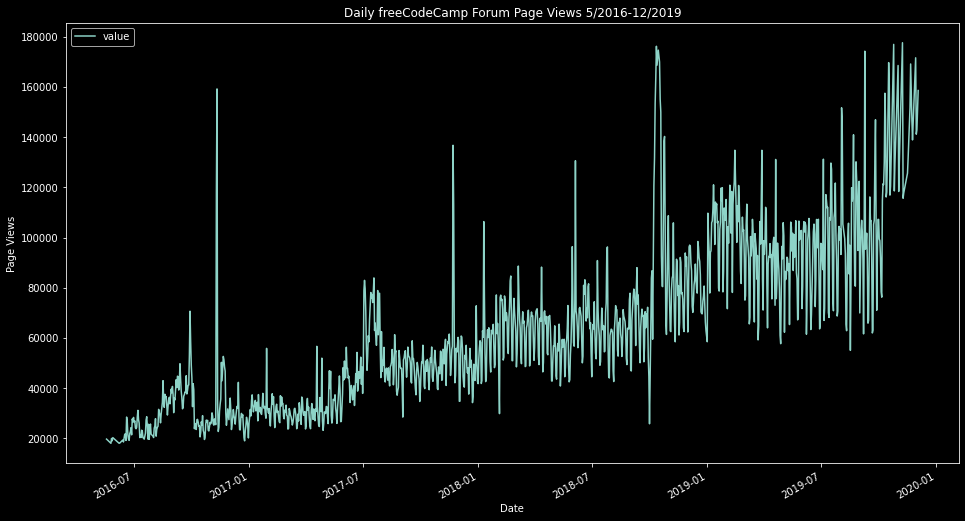

In [6]:
df_clean.plot(
  title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019',
  xlabel='Date',
  ylabel='Page Views',
  figsize=[16,9]
)

## Bar plot - Monthly page views

In [7]:
months = pandas.Series([
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
])

<Axes: xlabel='Years', ylabel='Average Page Views'>

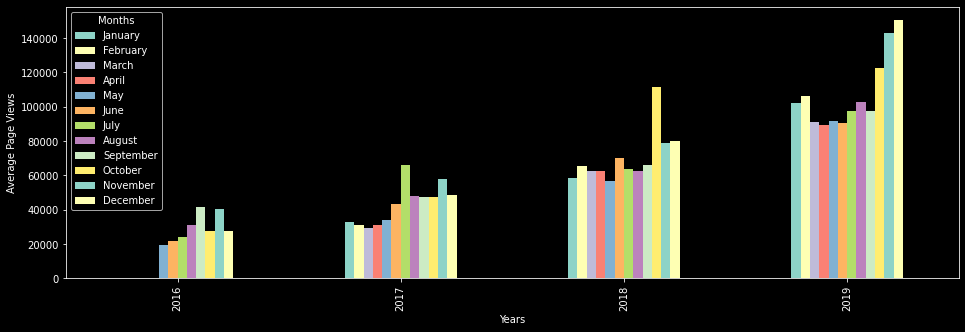

In [8]:
df_bar = df_clean.copy()

df_bar = df_bar.groupby([df_bar.index.year, df_bar.index.month_name()]).mean().unstack()

df_bar = df_bar.droplevel(0, axis=1)
df_bar = df_bar[months]
df_bar.columns.name = "Months"

df_bar.plot(kind='bar', figsize=[16,5], xlabel='Years', ylabel='Average Page Views')

## Box plots - Month and Year trends (Notebook only?)

[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views')]

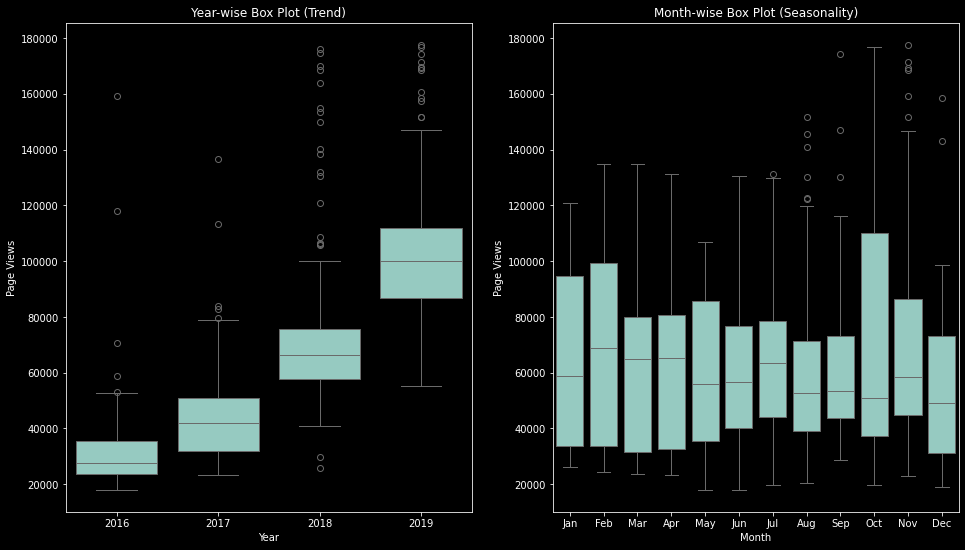

In [9]:
df_box = df_clean.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

fig, axes = plt.subplots(1,2, figsize=(16,9))

sns.boxplot(df_box, x='year', y='value', ax=axes[0]).set(
  title='Year-wise Box Plot (Trend)', 
  xlabel='Year',
  ylabel='Page Views'
)

sns.boxplot(df_box, x='month', y='value', ax=axes[1], order=months.str.slice(0,3)).set(
  title='Month-wise Box Plot (Seasonality)',
  xlabel='Month',
  ylabel='Page Views'
)
